In [2]:
%matplotlib inline
from textblob import TextBlob, Word
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [3]:
import csv
import pandas as pd
with open('reviewdatainonecomment.csv', 'r',encoding='utf-8') as f:
  reader = csv.reader(f)
  result = list(reader)

result = result[0]
result

['Bemishal has quickly adapted to working in the organization, despitebeing from a non-telecom background. She has been quick to understandthe product (m-pesa) and has demonstrated understanding of the businessand its applications. A keen mind and positive attitude along withperseverance has helped her get started.Hits vs Target on "What" aspect of performance:Tie up with a Microfinance company that will also help acquireVodafone customers has been a key closure. This will be the first SMEclosure for ANE and will prove to be a key differentiatorMisses vs Target on "What" aspect of performance:She has to get involved in the CSE piece that she has not been able totill now. A CSE RnR and ranking is a must. For this she has to interactwith the local teams and try meeting with CSEs.Hits on "How" aspect of performance (Vodafone Way Behaviours):Bemishal has been quick to figure out solutions as per requirements.Best example is how she quickly on boarded the cafeteria merchantinitially and als

In [4]:
# Text cleaning 
from string import punctuation
import re

def clean_sentence(sentence):
    sentence = re.sub(r"(?:\@|https?\://)\S+|\n+", "", sentence.lower())
    # Fix spelling errors in comments!
    sent = TextBlob(sentence)
    sent.correct()
    clean = ""
    for sentence in sent.sentences:    
        words = sentence.words
        # Remove punctuations
        words = [''.join(c for c in s if c not in punctuation) for s in words]
        words = [s for s in words if s]
        clean += " ".join(words)
        clean += ". "
    return clean

result = [clean_sentence(x) for x in result]
result

['bemishal has quickly adapted to working in the organization despitebeing from a nontelecom background. she has been quick to understandthe product mpesa and has demonstrated understanding of the businessand its applications. a keen mind and positive attitude along withperseverance has helped her get startedhits vs target on what aspect of performance tie up with a microfinance company that will also help acquirevodafone customers has been a key closure. this will be the first smeclosure for ane and will prove to be a key differentiatormisses vs target on what aspect of performance she has to get involved in the cse piece that she has not been able totill now. a cse rnr and ranking is a must. for this she has to interactwith the local teams and try meeting with cseshits on how aspect of performance vodafone way behaviours bemishal has been quick to figure out solutions as per requirementsbest example is how she quickly on boarded the cafeteria merchantinitially and also has shown prog

In [5]:
# Check sentiment polarity of each sentence.
sentiment_scores = list()
i = 0
for sentence in result:
    line = TextBlob(sentence)
    sentiment_scores.append(line.sentiment.polarity)
    if(i <= 10):
        print(sentence + ": POLARITY=" + str(line.sentiment.polarity))
        i += 1

bemishal has quickly adapted to working in the organization despitebeing from a nontelecom background. she has been quick to understandthe product mpesa and has demonstrated understanding of the businessand its applications. a keen mind and positive attitude along withperseverance has helped her get startedhits vs target on what aspect of performance tie up with a microfinance company that will also help acquirevodafone customers has been a key closure. this will be the first smeclosure for ane and will prove to be a key differentiatormisses vs target on what aspect of performance she has to get involved in the cse piece that she has not been able totill now. a cse rnr and ranking is a must. for this she has to interactwith the local teams and try meeting with cseshits on how aspect of performance vodafone way behaviours bemishal has been quick to figure out solutions as per requirementsbest example is how she quickly on boarded the cafeteria merchantinitially and also has shown progre

e:\anacondasoftware\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
e:\anacondasoftware\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
e:\anacondasoftware\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


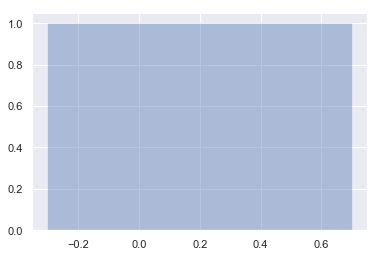

In [6]:
sns.distplot(sentiment_scores)

In [7]:
# Convert array of comments into a single string
comments = TextBlob(' '.join(result))
# Check out noun phrases, will be useful for frequent feature extraction
comments.noun_phrases

WordList(['nontelecom background', 'understandthe product mpesa', 'keen mind', 'positive attitude', 'startedhits vs target', 'performance tie', 'microfinance company', 'acquirevodafone customers', 'key closure', 'key differentiatormisses vs target', 'cse piece', 'able totill', 'cse rnr', 'local teams', 'performance vodafone way behaviours bemishal', 'requirementsbest example', 'new vendorshe', 'problems onpriority', 'quick solutions', 'b2c client', 'performance vodafone way behaviours bemishal needs', 'infancyspecific focus', 'bulk accounts', 'hascomplete visibility', 'bulk accounts', 'fewsmall accounts', 'overall appreciation', 'months amitava', 'good job knowledge', 'skilled communicator', 'playdifferent role', 'overall performance', 'center kpi', 'trackgood progress', 'bank tatat gujarat', 'issues bottlnecks', 'team player', 'mannerto achive resultshits vs target', 'performance a1', 'bank tatservice level', 'trackexternal quality scores', 'trackmpesa v20 project implementation', 'tr

In [8]:
#compactness pruning:
cleaned = list()
for phrase in comments.noun_phrases:
    count = 0
    for word in phrase.split():
        # Count the number of small words and words without an English definition
        if len(word) <= 2 or (not Word(word).definitions):
            count += 1
    # Only if the 'nonsensical' or short words DO NOT make up more than 40% (arbitrary) of the phrase add
    # it to the cleaned list, effectively pruning the ones not added.
    if count < len(phrase.split())*0.4:
        cleaned.append(phrase)
        
print("After compactness pruning:\nFeature Size:")
len(cleaned)

After compactness pruning:
Feature Size:


333

In [9]:
for phrase in cleaned:    
    match = list()
    temp = list()
    word_match = list()
    for word in phrase.split():
        # Find common words among all phrases
        word_match = [p for p in cleaned if re.search(word, p) and p not in word_match]
        # If the size of matched phrases set is smaller than 30% of the cleaned phrases, 
        # then consider the phrase as non-redundant.
        if len(word_match) <= len(cleaned)*0.3 :
            temp.append(word)
            match += word_match
            
    phrase = ' '.join(temp)
#     print("Match for " + phrase + ": " + str(match))

    if len(match) >= len(cleaned)*0.1 :
        # Redundant feature set, since it contains more than 10% of the number of phrases. 
        # Prune all matched features.
        for feature in match:
            if feature in cleaned:
                cleaned.remove(feature)
            
        # Add largest length phrase as feature
        cleaned.append(max(match, key=len))
        

print("After redundancy pruning:\nFeature Size:" + str(len(cleaned)))
print("Cleaned features:")
cleaned


After redundancy pruning:
Feature Size:262
Cleaned features:


['keen mind',
 'positive attitude',
 'key closure',
 'cse piece',
 'local teams',
 'quick solutions',
 'bulk accounts',
 'bulk accounts',
 'good job knowledge',
 'skilled communicator',
 'team player',
 'trackexternal quality scores',
 'customer experience',
 'process correction',
 'tough problems',
 'current approach',
 'process correction',
 'customer experiencefurther focus',
 'business goals',
 'customer satisfaction score',
 'functional team',
 'address issues',
 'right stakeholders forresolutionadapt',
 'different situations',
 'channel aheadof curve',
 'major achievement',
 'channel partners',
 'distribution team atfrontline',
 'decision making withcross',
 'functional teams',
 'transactional value targets',
 'red hills',
 'distribution rigor',
 'hygiene leaves',
 'channel partners',
 'distribution team atfrontline',
 'customer acquisition',
 'transaction value',
 'regards development',
 'big shifttargetramendra engagement',
 'functional teams',
 'team lacks analytical skillsand

In [10]:
from nltk.corpus import stopwords
feature_count = dict()
for phrase in cleaned:
    count = 0
    for word in phrase.split():
        if word not in stopwords.words('english'):
            count += comments.words.count(word)
    
    print(phrase + ": " + str(count))
    feature_count[phrase] = count

keen mind: 2
positive attitude: 4
key closure: 11
cse piece: 5
local teams: 13
quick solutions: 8
bulk accounts: 5
bulk accounts: 5
good job knowledge: 34
skilled communicator: 2
team player: 15
trackexternal quality scores: 15
customer experience: 22
process correction: 15
tough problems: 3
current approach: 12
process correction: 15
customer experiencefurther focus: 32
business goals: 29
customer satisfaction score: 31
functional team: 21
address issues: 6
right stakeholders forresolutionadapt: 10
different situations: 3
channel aheadof curve: 13
major achievement: 8
channel partners: 13
distribution team atfrontline: 21
decision making withcross: 7
functional teams: 18
transactional value targets: 10
red hills: 2
distribution rigor: 6
hygiene leaves: 2
channel partners: 13
distribution team atfrontline: 21
customer acquisition: 24
transaction value: 6
regards development: 10
big shifttargetramendra engagement: 12
functional teams: 18
team lacks analytical skillsand: 18
result develo

In [32]:
# Select frequent feature threshold as (max_count)/100 
# This is an arbitrary decision as of now.
counts = list(feature_count.values())
features = list(feature_count.keys())
threshold = len(comments.noun_phrases)/100
#threshold=66

print("Threshold:" + str(threshold))

frequent_features = list()

for feature, count in feature_count.items():
    if count >= threshold:
        frequent_features.append(feature)
print(' Features:')
frequent_features=frequent_features[0:5]
frequent_features

Threshold:5.73
 Features:


['key closure',
 'local teams',
 'quick solutions',
 'good job knowledge',
 'team player']

In [33]:
def nltk_sentiment(sentence):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    
    nltk_sentiment = SentimentIntensityAnalyzer()
    score = nltk_sentiment.polarity_scores(sentence)
    return score
#b=dataset.values.T.tolist()
#print(b)
nltk_results = [nltk_sentiment(row) for row in frequent_features]
#print(nltk_results)
results_df = pd.DataFrame(nltk_results)
#print(results_df)
text_df = pd.DataFrame(frequent_features)
#print(text_df)
nltk_df = text_df.join(results_df)
#nltk_df1=nltk_df[[0,'neu']]
#print(nltk_df)


In [72]:
nltk_df.head(5)

,0,compound,neg,neu,pos
0,performance tie,0.0000,0.0,1.00,0.00
1,key closure,0.0000,0.0,1.00,0.00
2,local teams,0.0000,0.0,1.00,0.00
3,quick solutions,0.1779,0.0,0.37,0.63
4,performance vodafone way behaviours bemishal n...,0.0000,0.0,1.00,0.00


In [17]:
newdf=nltk_df[0]
newdf=pd.DataFrame({'features':nltk_df[0],'pos':nltk_df['pos'],'neg':nltk_df['neg']})
newdf.pos=newdf.pos+0.2
newdf.neg=newdf.neg-0.2
newdf

,features,pos,neg
0,key closure,0.200,-0.2
1,local teams,0.200,-0.2
2,quick solutions,0.830,-0.2
3,good job knowledge,0.792,-0.2
4,team player,0.200,-0.2
5,trackexternal quality scores,0.200,-0.2
6,customer experience,0.200,-0.2
7,process correction,0.200,-0.2
8,current approach,0.200,-0.2
9,customer experiencefurther focus,0.200,-0.2


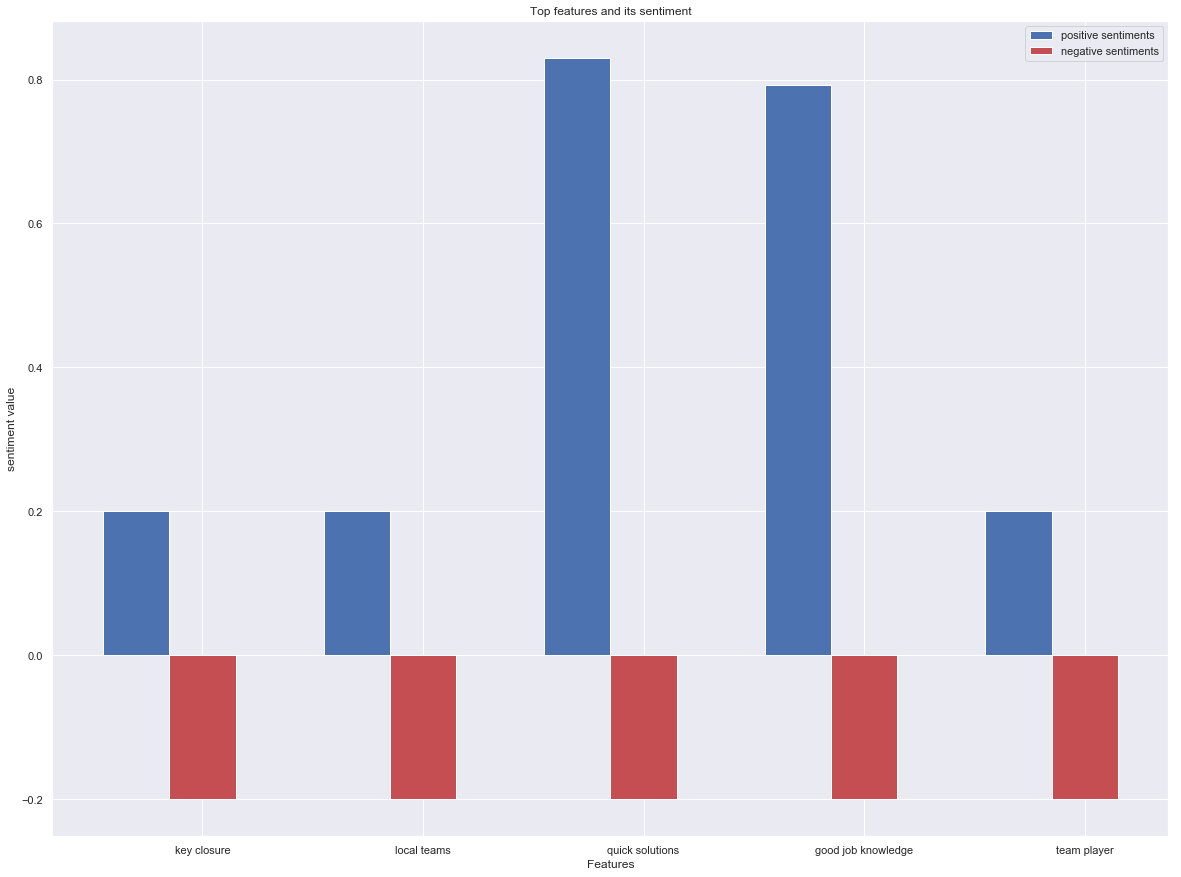

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
newdf

#noun=['positive attitude','good job knowledge','team player','customer acquisition','good visibility','back office process','successful launch','soft skills','suitable candidates','core issues']
#pos_l=[0.71,0.42,0.3,0.2,0.2,0.6,0.2,0.5,0.43,0]
#neg_l=[-0.1,0,-0.300,0,-0.1,0,-0.1,-0.2,0,-0.3]

pos=newdf[0:5]['pos']
neg=newdf[0:5]['neg']

# data to plot
n_groups = 5
positive =newdf['pos'].head(5) 
negative =newdf['neg'].head(5)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.3
opacity = 1
 
rects1 = plt.bar(index, positive, bar_width,
alpha=opacity,
color='b',
label='positive sentiments')
 
rects2 = plt.bar(index + bar_width, negative, bar_width,
alpha=opacity,
color='r',
label='negative sentiments')
 
plt.xlabel('Features')
plt.ylabel('sentiment value')
plt.title('Top features and its sentiment')
plt.xticks(index + bar_width, newdf['features'].head(5))
plt.legend()
fig.set_size_inches(20, 15)
plt.show()

In [34]:
absa_list = dict()
print(absa_list)
# For each frequent feature
for f in frequent_features:
    # For each comment
    absa_list[f] = list()
    for comment in result:
        blob = TextBlob(comment)
        # For each sentence of the comment
        for sentence in blob.sentences:
            # Search for frequent feature 'f'
            q = '|'.join(f.split())
            if re.search(r'\w*(' + str(q) + ')\w*', str(sentence)):
                absa_list[f].append(sentence)


print("Aspect Specific sentences:")
absa_list

{}
Aspect Specific sentences:


{'good job knowledge': [Sentence("overall appreciation for performance in last 12 months amitava has a good job knowledge and presents his ideas with clarityhard working and passionate."),
  Sentence("overall performance on call center kpi were on trackgood progress on a1 to bank tatat gujarat he has adapted very well and moving towards resolving issues bottlnecks in achievement of goals."),
  Sentence("his distribution while at uaa and uta levelhas done well the distribution rigor and hygiene leaves much to bedesiredhe needs to improve his skills to influence key stake holders whichwould not only help him improve mpesa business but will also himdevelop as good professionalmypd ramendra has done well in mpesa."),
  Sentence("further best practices like sbicsp advms as mpesa hubs need to be executed with perfection on theground to get good mileage on the groundhe needs to improve his analytical skills which will help himunderstand the retail and customer segmentation which in turn willh

In [35]:
scores = list()
absa_scores = dict()
for k, v in absa_list.items():
    absa_scores[k] = list()
    for sent in v:
        score = sent.sentiment.polarity
        scores.append(score)
        absa_scores[k].append(score)

e:\anacondasoftware\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
e:\anacondasoftware\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
e:\anacondasoftware\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


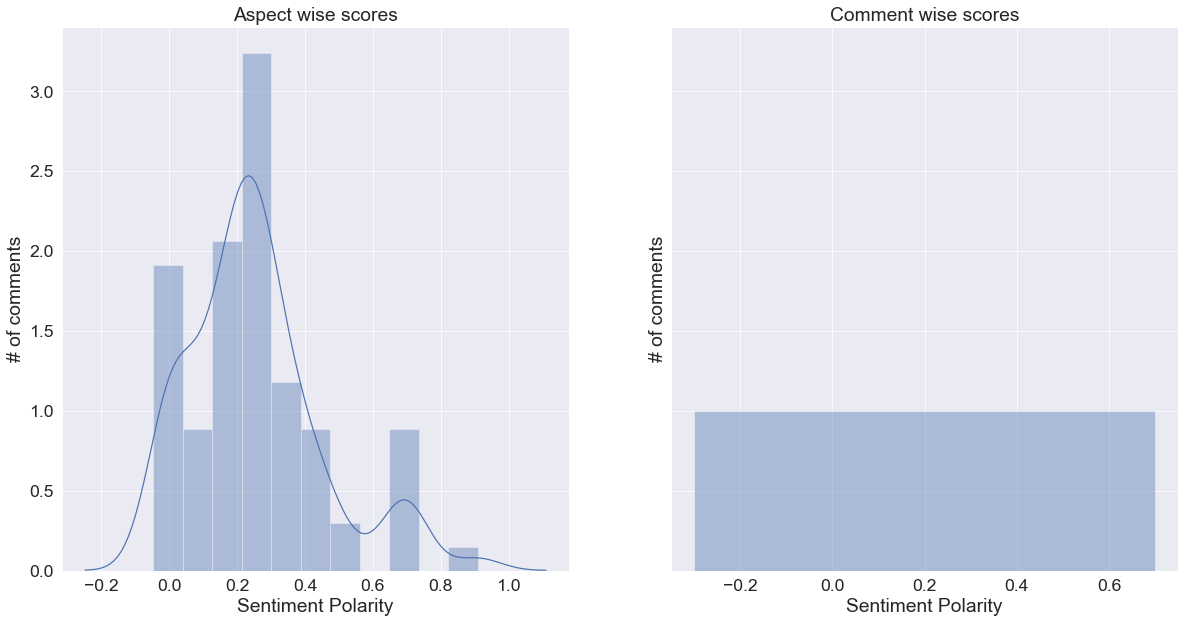

In [36]:
# Now that we have all the scores, let's plot them!
# For comparison, we replot the previous global sentiment polarity plot
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(20, 10))
plot1 = sns.distplot(scores, ax=ax1)

ax1.set_title('Aspect wise scores')
ax1.set_xlabel('Sentiment Polarity')
ax1.set_ylabel('# of comments')

ax2.set_title('Comment wise scores')
ax2.set_xlabel('Sentiment Polarity')
ax2.set_ylabel('# of comments')

plot2 = sns.distplot(sentiment_scores, ax=ax2)

In [37]:
# Create data values for stripplot and boxplot
vals = dict()
vals["aspects"] = list()
vals["scores"] = list()
for k, v in absa_scores.items():
    for score in v:
        vals["aspects"].append(k)
        vals["scores"].append(score)

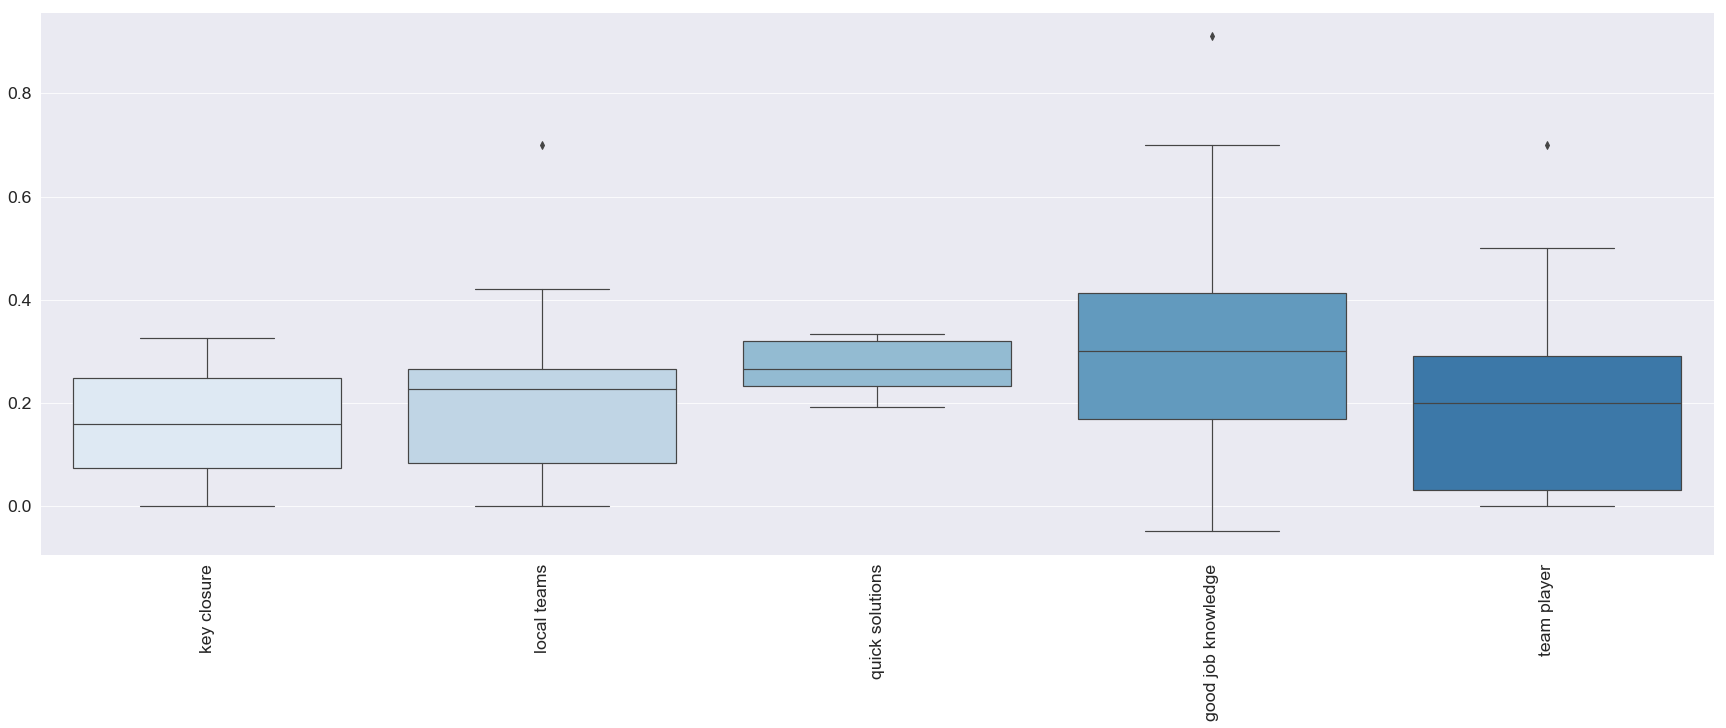

In [38]:
fig, ax1 = plt.subplots(figsize=(30, 10))

color = sns.color_palette("Blues", 6)
plt.xticks(rotation=90)
sns.set_context("paper", font_scale=3) 
sns.boxplot(x="aspects", y="scores", data=vals, palette=color, ax=ax1)

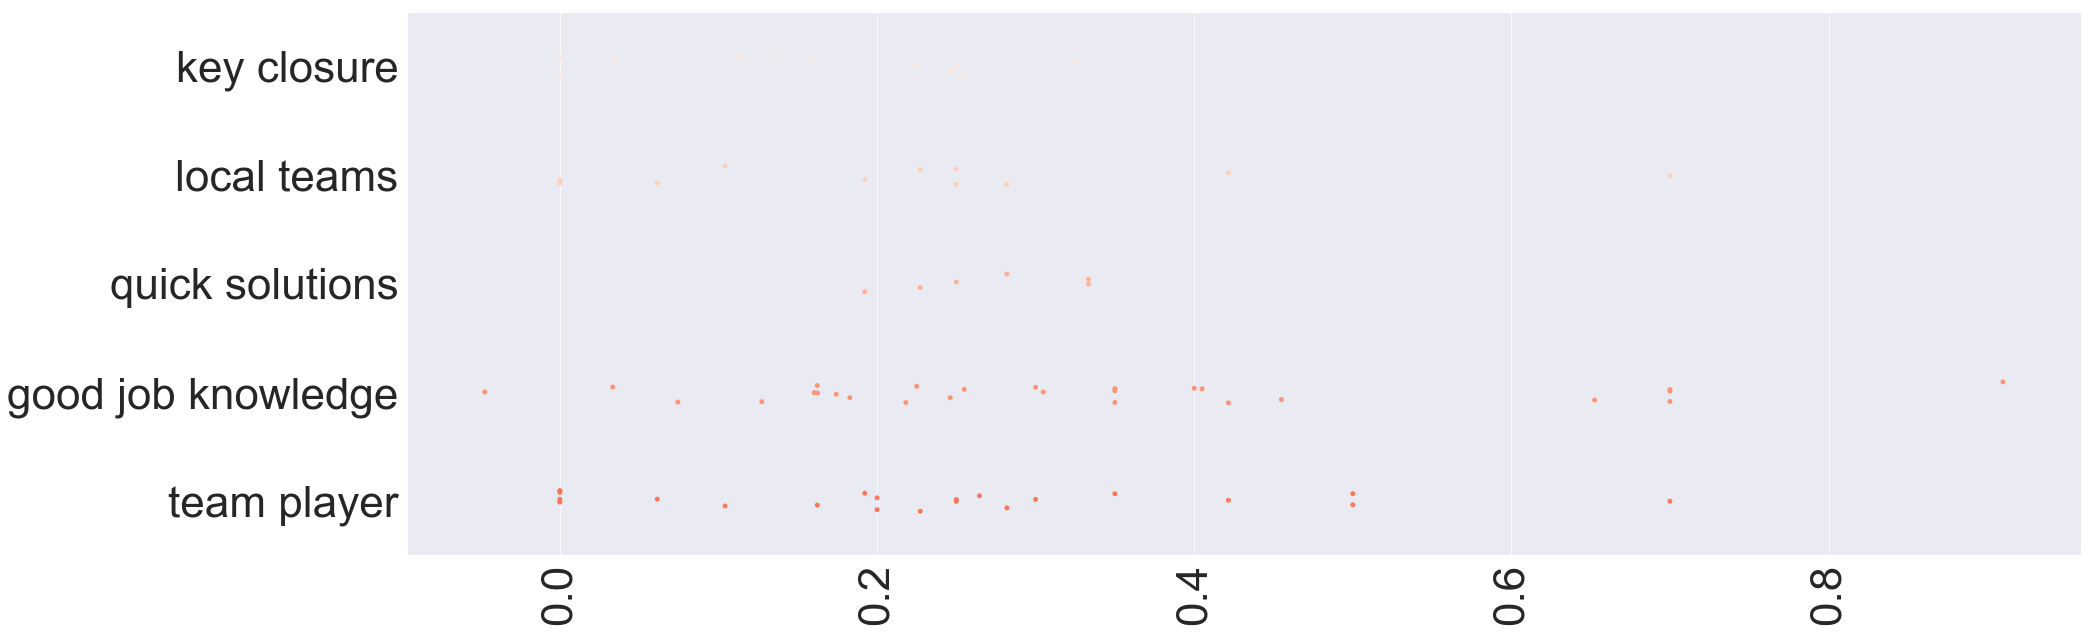

In [48]:
color = sns.color_palette("Reds", 10)
fig, ax1 = plt.subplots(figsize=(30, 10))
plt.xticks(rotation=90)
sns.set_context("paper", font_scale=5) 
sns.stripplot(y="aspects", x="scores",data=vals, palette=color)